<a href="https://colab.research.google.com/github/nageshwarkumar/Data-Science-Capstone-Project/blob/main/Capstone_Project(car_details_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Read the dataset

In [3]:
df = pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Data cleaning and preprocessing

In [4]:
# null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Drop Duplicates

In [5]:
df.duplicated().sum()

763

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission'])


Exploratory Data Analysis (EDA)

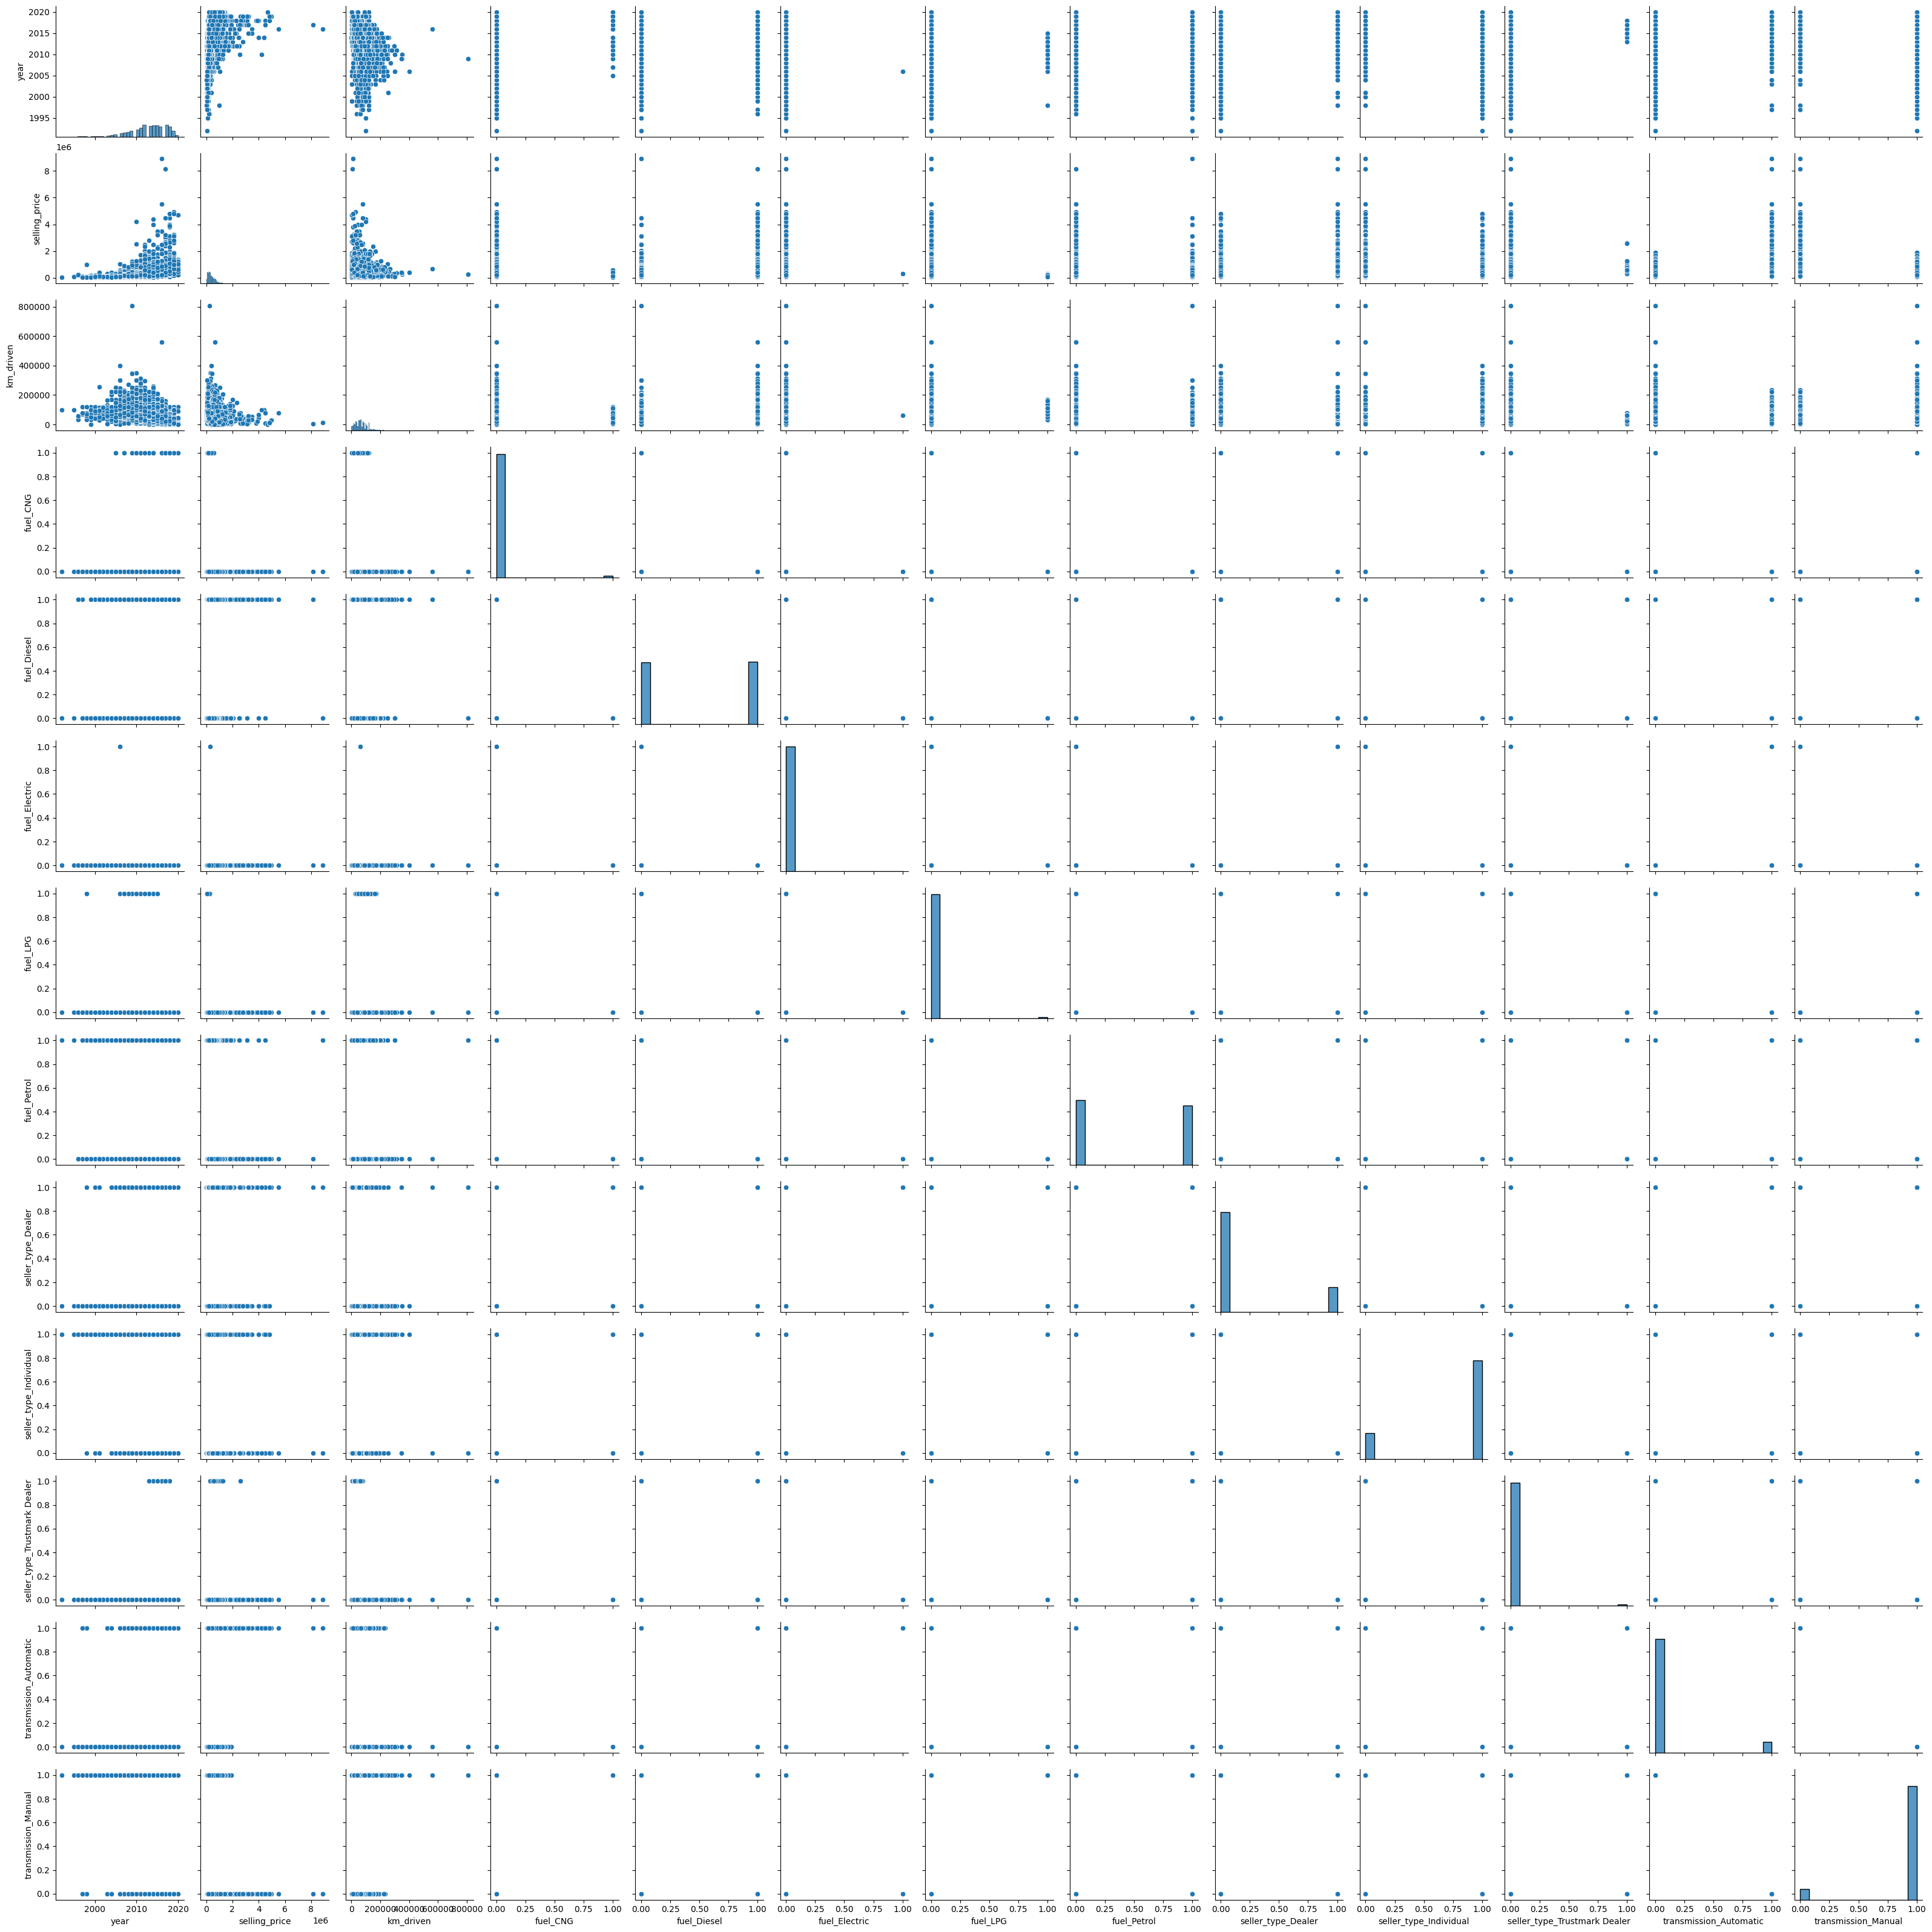

In [49]:
# Pairplot
sns.pairplot(df_encoded)
plt.show()

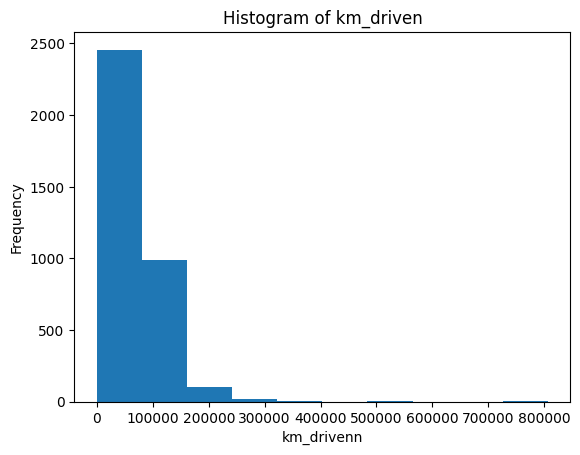

In [34]:
plt.hist(df['km_driven'], bins=10)
plt.xlabel('km_drivenn')
plt.ylabel('Frequency')
plt.title('Histogram of km_driven')
plt.show()

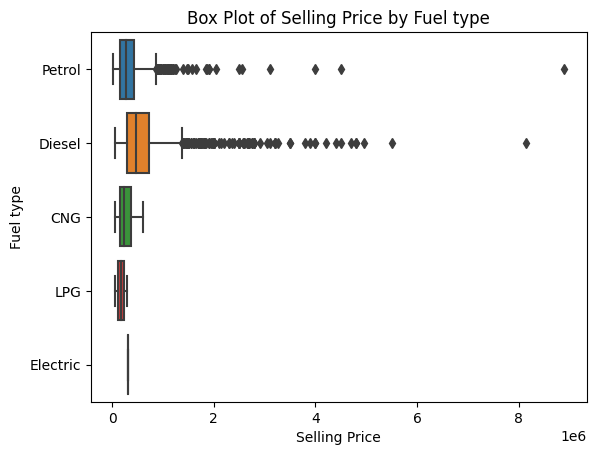

In [41]:
sns.boxplot(x=df['selling_price'], y=df['fuel'])
plt.xlabel('Selling Price')
plt.ylabel('Fuel type')
plt.title('Box Plot of Selling Price by Fuel type')
plt.show()


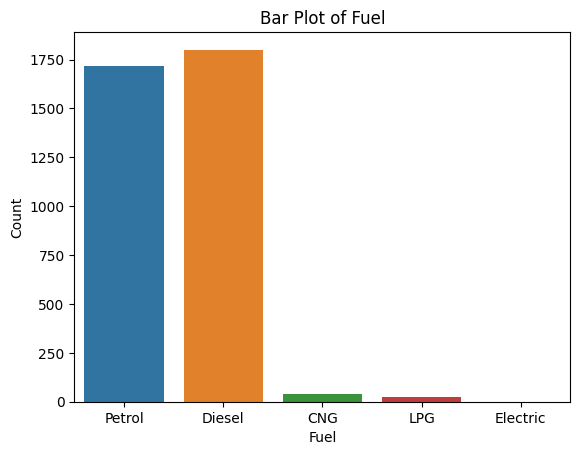

In [44]:
sns.countplot(x='fuel', data=df)
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.title('Bar Plot of Fuel')
plt.show()



<ipython-input-45-c27b59e62d52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


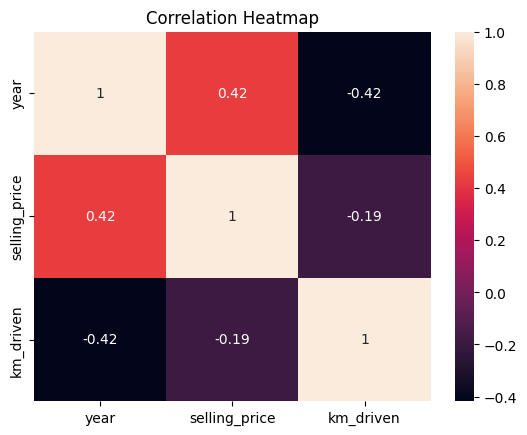

In [45]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# features (X) and target variable (y)
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [20]:
print(X.shape)
print(y.shape)

(3577, 7)
(3577,)


In [26]:
# One-Hot Encoding for categorical columns
categorical_cols = ['fuel', 'seller_type', 'transmission']
numeric_cols = ['year', 'km_driven']

preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols),
        ('scaler', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)
X_encoded = preprocessor.fit_transform(X)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


Apply Machine Learning techniques

In [46]:
# Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict on the test set
y_pred = model.predict(X_test)

In [48]:
# Evaluate the ml model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1.5141857734109075e+17


Save the best model and Load the model.

In [52]:
import pickle

# Save ml model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load ml model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


Take the original dataset and make another dataset by randomly picking 20 data points from the CAR DETAILS dataset and apply the saved model on the same dataset to test the model.

In [68]:
data20 = df.sample(20)
data20

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2917,Maruti Alto 800 VXI,2016,220000,60000,Petrol,Individual,Manual,Second Owner
3432,Maruti Wagon R LX Minor,2007,100000,100000,Petrol,Individual,Manual,First Owner
294,Maruti Wagon R VXI,2014,315000,41000,Petrol,Dealer,Manual,First Owner
2894,Chevrolet Cruze LTZ,2014,550000,52000,Diesel,Dealer,Manual,First Owner
407,Maruti Swift Glam,2009,250000,70000,Petrol,Individual,Manual,First Owner
424,Ford Figo Petrol Titanium,2011,120000,60000,Petrol,Individual,Manual,Third Owner
1664,Renault KWID RXT,2016,200000,53000,Petrol,Individual,Manual,Second Owner
1280,Honda Jazz VX CVT,2016,580000,32000,Petrol,Dealer,Automatic,First Owner
1587,Chevrolet Cruze LTZ,2012,400000,40000,Diesel,Individual,Manual,First Owner
2658,Maruti Alto LXi,2006,150000,75118,Petrol,Individual,Manual,Second Owner


In [69]:
# Save ml model for data20
with open('data20.pkl', 'wb') as f:
    pickle.dump(data20, f)
